<a href="https://colab.research.google.com/github/kdambrowski/Data_science/blob/main/hue_moments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python
!pip install pillow


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import urllib.request
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
import seaborn as sns


In [ ]:
def show_histogram(image):
  if image.ndim >2:
    ax1 = plt.subplot(311)
    plt.xlim([0, 1_000])
    plt.ylim([0, 1_000])
    for i, col in enumerate(['b', 'g', 'r']):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        ax1 = plt.subplot(3,1,1+i, sharey=ax1)
        plt.plot(hist, color = col)

        if i<2:
            plt.setp(ax1.get_xticklabels(), visible=False)
            plt.show()
  else:
    plt.hist(image.ravel(),bins = 256, range=[0,256], color='gray')
    plt.show()

def show_hsv_equalized(image):
    new_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    H, S, V = cv2.split(new_image)
    eq_V = cv2.equalizeHist(V)
    eq_image = cv2.cvtColor(cv2.merge([H, S, eq_V]), cv2.COLOR_HSV2BGR)
    cv2_imshow(eq_image)
    show_histogram(eq_image)

In [ ]:

urllib.request.urlretrieve(
  'https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png','Lenna_(test_image).png')
  
img = Image.open("Lenna_(test_image).png")

In [ ]:
urllib.request.urlretrieve(
  'https://i.stack.imgur.com/7Qnug.jpg','7Qnug.jpg')
  
shapes = Image.open("7Qnug.jpg")

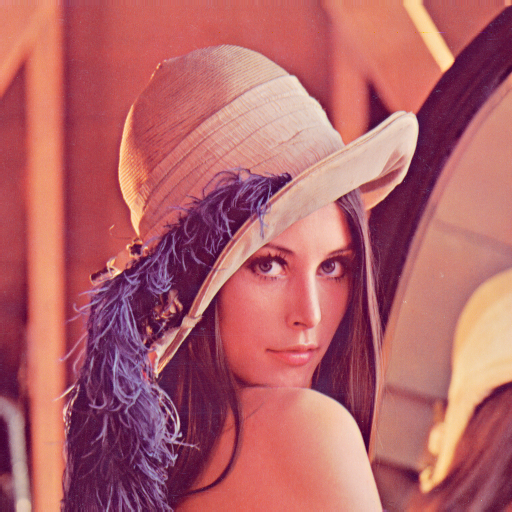

In [ ]:
image = cv2.imread('/content/Lenna_(test_image).png')
cv2_imshow(image)

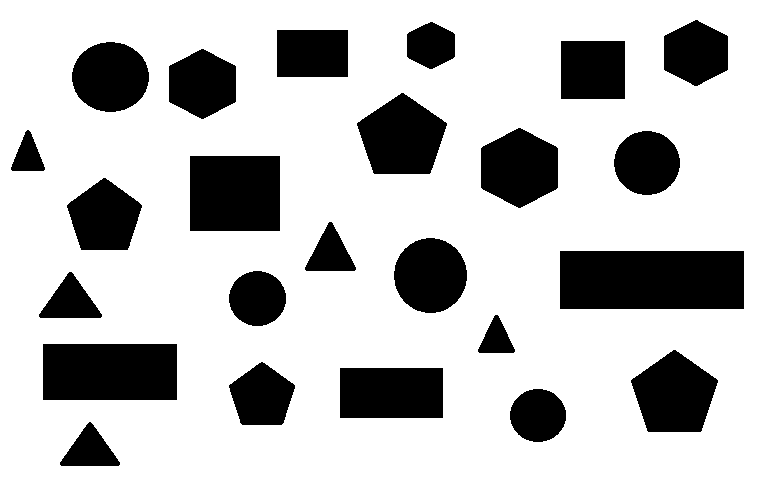

In [ ]:
shapes = cv2.imread('/content/7Qnug.jpg')
cv2_imshow(shapes)

In [ ]:
h, w, c = image.shape
print(f'width: {w} pixels')
print(f'height: {h} pixels')
print(f'channels: {c} colors')

width: 512 pixels
height: 512 pixels
channels: 3 colors


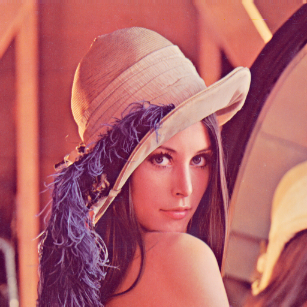

In [ ]:
scale_percentage = 0.6

width = int(image.shape[1] * scale_percentage)
height = int(image.shape[0] * scale_percentage)
dim = (width, height)

image_resized = cv2.resize(image, dim)
cv2_imshow(image_resized)

In [ ]:
image = image.astype('float')
image /= 255
image.min(), image.max()

(0.011764705882352941, 1.0)

In [ ]:
image = cv2.imread('/content/Lenna_(test_image).png')

In [ ]:
image_b, image_g, image_r = cv2.split(image)

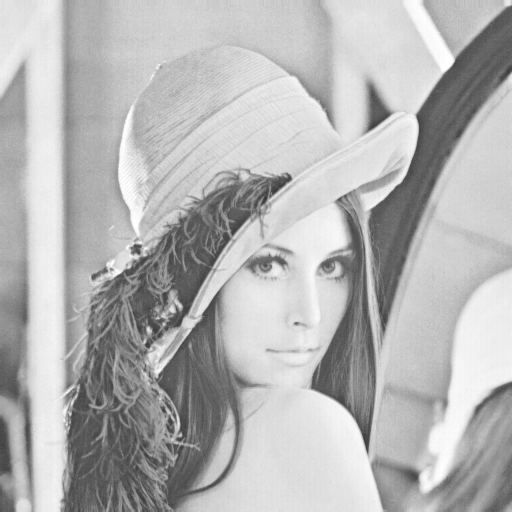

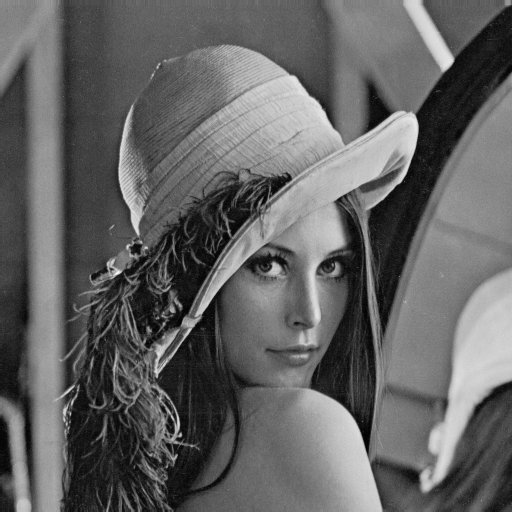

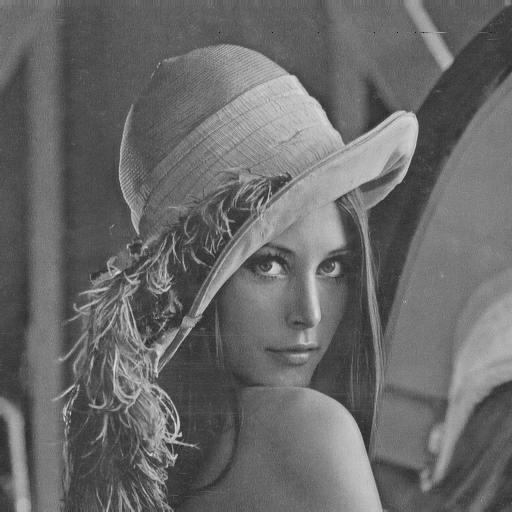

In [ ]:
cv2_imshow(image_r)
cv2_imshow(image_g)
cv2_imshow(image_b)

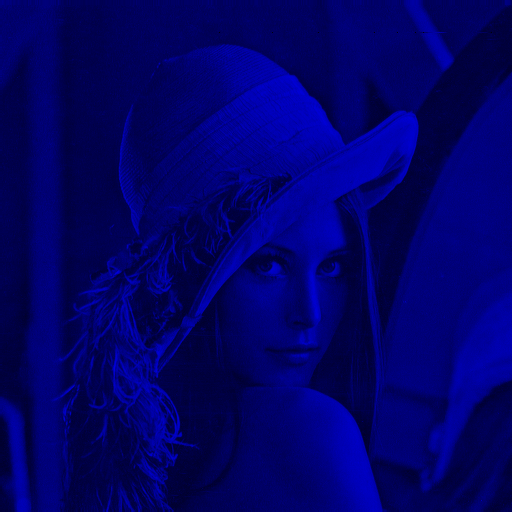

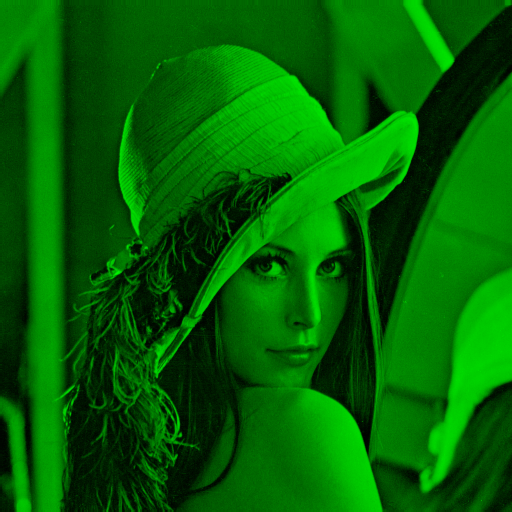

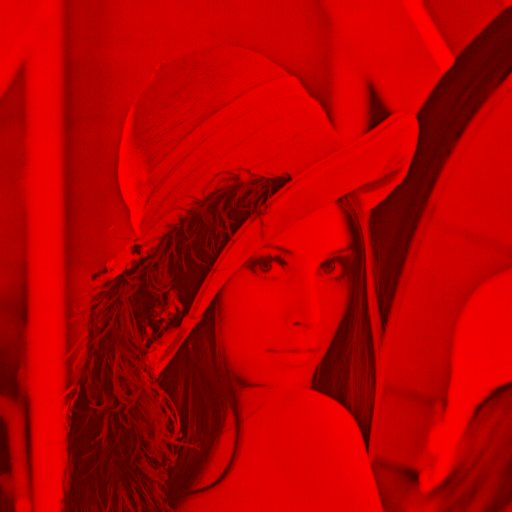

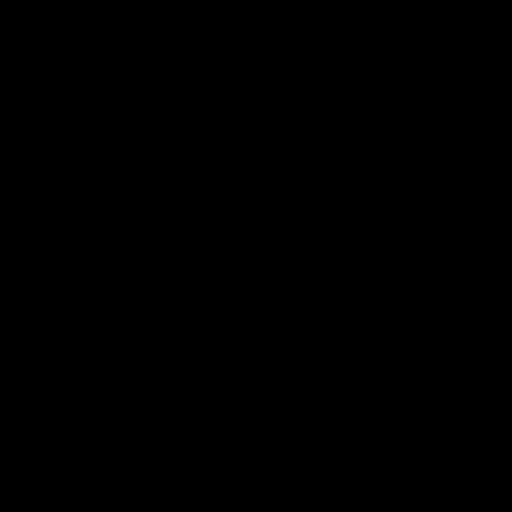

In [ ]:

b = image.copy()
b[:, :, 1] = 0
b[:, :, 2] = 0

cv2_imshow(b)

g = image.copy()
g[:, :, 0] = 0
g[:, :, 2] = 0

cv2_imshow(g)

r = image.copy()
r[:, :, 0] = 0
r[:, :, 1] = 0
cv2_imshow(r)

black = image.copy()
black[:, :, 0] = 0
black[:, :, 1] = 0
black[:, :, 2] = 0

cv2_imshow(black)


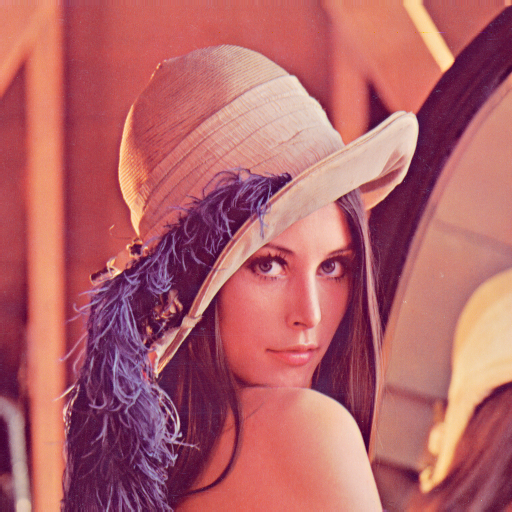

In [ ]:
cv2_imshow(b+g+r)

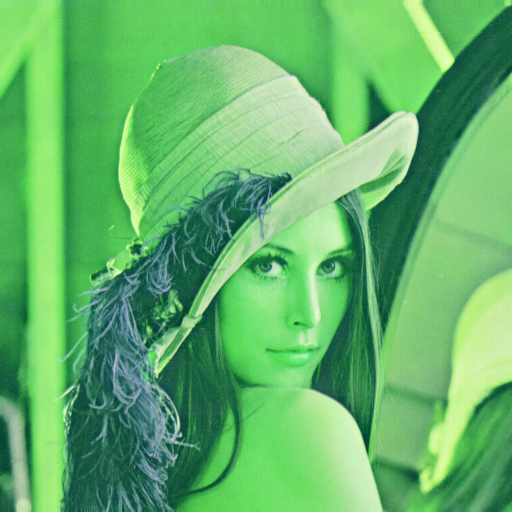

In [ ]:
im_rgb = image[:, :, [2, 1, 0]] #RGB
im_rgb = image[:, :, [1, 0, 2]]
im_rgb = image[:, :, [2, 0, 1]]
im_rgb = image[:, :, [1, 2, 0]]
im_rgb = image[:, :, [0, 2, 1]]
cv2_imshow(im_rgb)

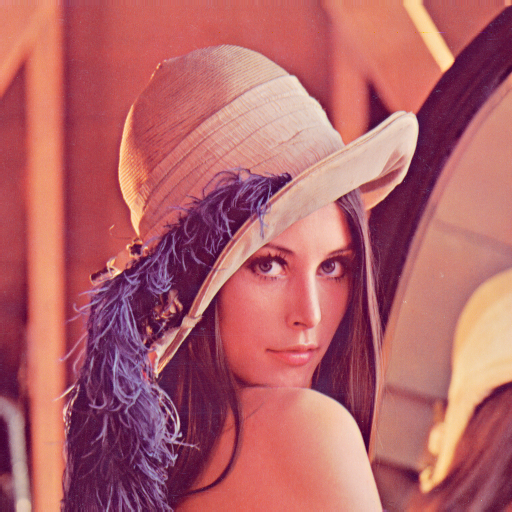

In [ ]:
# filters
import numpy as np

def apply_filter(source, kernel):
    new_image = cv2.filter2D(source, -1, kernel)
    cv2_imshow(new_image)

    return new_image


identity_kernel = np.array([
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 0]
])

_ = apply_filter(image, identity_kernel)

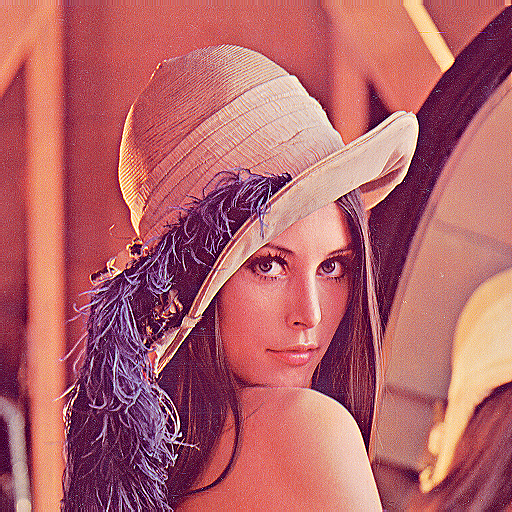

In [ ]:
# sharpen
sharpen_kernel = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

_ = apply_filter(image, sharpen_kernel)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
blur matrix 
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


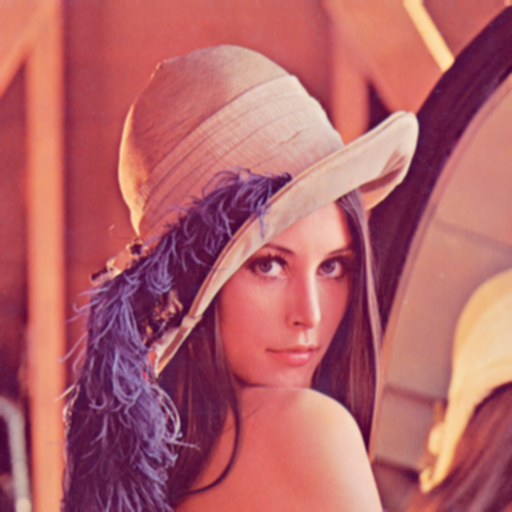

In [ ]:
# blur
blur_matrix = np.ones((3, 3),np.float32)
print(blur_matrix)
blur_kernel = blur_matrix/ 9
print(f'blur matrix \n{blur_kernel}')
_ = apply_filter(image, blur_kernel)

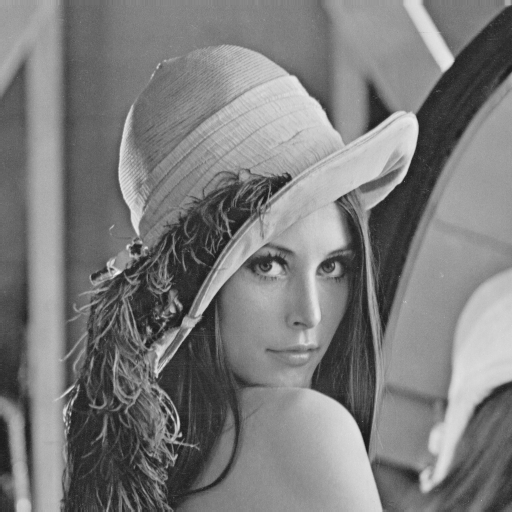

In [ ]:
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_img)

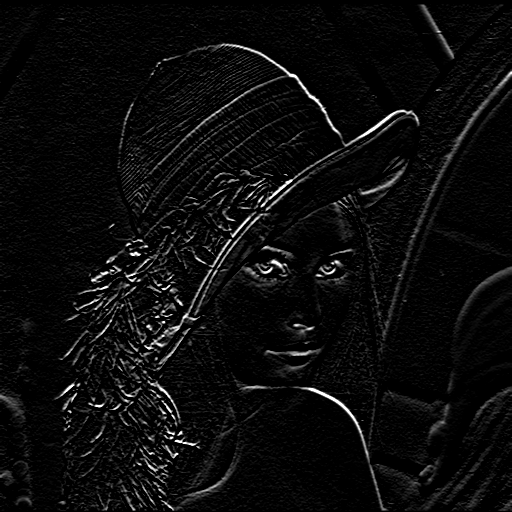

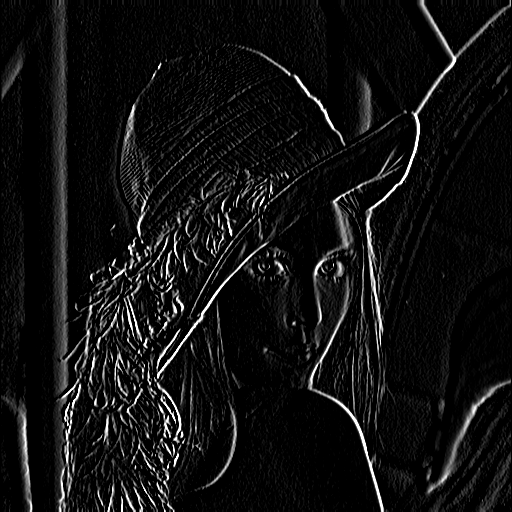

In [ ]:
# bottom sobel
bottom_sobel_kernel = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
])

bottom_sobel = apply_filter(gray_img, bottom_sobel_kernel)
#vertical sobel
left_sobel_kernel = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
])

left_sobel = apply_filter(gray_img, left_sobel_kernel)

#sobel
sobel = left_sobel/2 + bottom_sobel/2


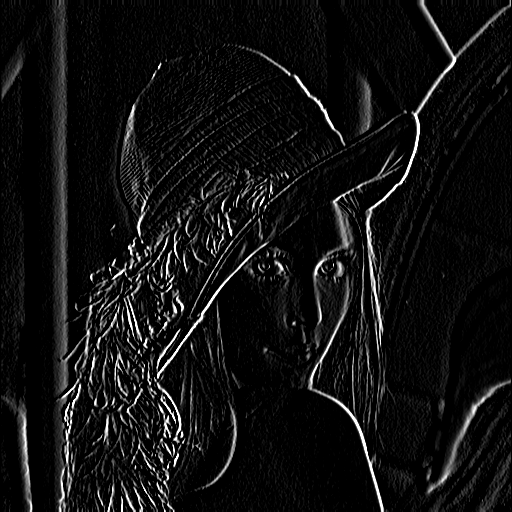

In [ ]:
#vertical sobel
left_sobel_kernel = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
])

left_sobel = apply_filter(gray_img, left_sobel_kernel)

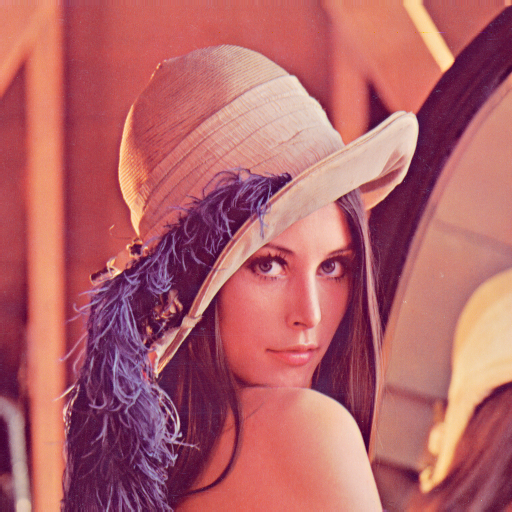

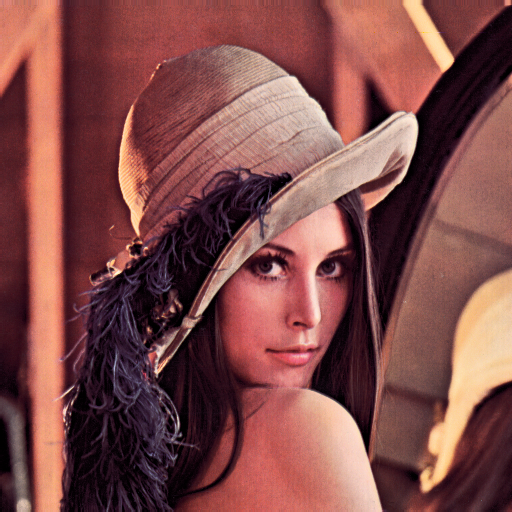

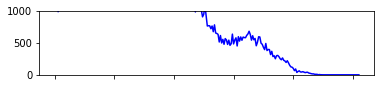

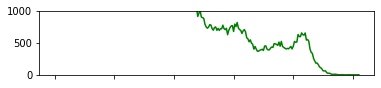

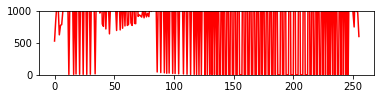

In [ ]:
cv2_imshow(image)
show_hsv_equalized(image)

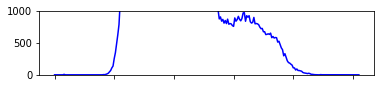

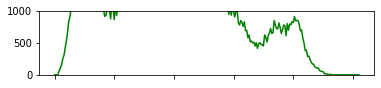

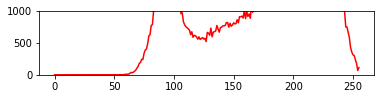

In [ ]:
show_histogram(image)

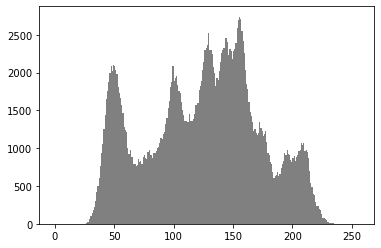

In [ ]:
show_histogram(gray_img)

In [ ]:
image = image.astype('uint8')

In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def threshold(img):
    @interact(x=widgets.IntSlider(min=0, max=255, step=1, value=100))

    def trackbar(x):
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        _, thresh1 = cv2.threshold(gray_img, x, 255, cv2.THRESH_BINARY)
        cv2_imshow(thresh1)

        return x

threshold(image)

interactive(children=(IntSlider(value=100, description='x', max=255), Output()), _dom_classes=('widget-interac…

In [ ]:
def adaptive_threshold(img):
    @interact(
        x=widgets.IntSlider(min=3, max=257, step=2, value=9),
        y=True
    )

    def trackbar(x, y):
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        if y:
            adaptive_method = cv2.ADAPTIVE_THRESH_MEAN_C
        else:
            adaptive_method = cv2.ADAPTIVE_THRESH_GAUSSIAN_C
            
        thresh1 = cv2.adaptiveThreshold(
            gray_img,
            255,
            adaptive_method,
            cv2.THRESH_BINARY,
            x,
            2
        )
        cv2_imshow(thresh1)
        return x

adaptive_threshold(image)

interactive(children=(IntSlider(value=9, description='x', max=257, min=3, step=2), Checkbox(value=True, descri…

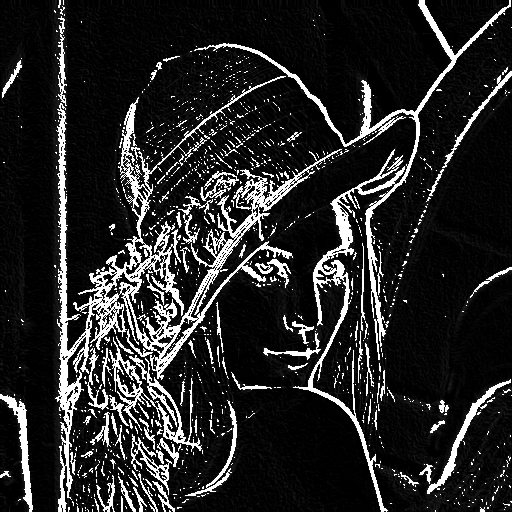

interactive(children=(Dropdown(description='operation', options=('Erosion', 'Dilation', 'Opening', 'Closing'),…

In [ ]:
def morphological_operation(image):
    def opening(img, kernel):
        return cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
    
    def closing(img, kernel):
        return cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
    
    @interact(operation=[
            'Erosion',
            'Dilation',
            'Opening',
            'Closing'
        ],
        struct_el=['MORPH_RECT','MORPH_ELLIPSE', 'MORPH_CROSS'],
        size = widgets.IntSlider(min=3, max=15, step=2, value=5)
    )
    
    def trackbar(operation, struct_el, size):
        operation_dict = {
            'Erosion': cv2.erode,
            'Dilation': cv2.dilate,
            'Opening': opening,
            'Closing': closing
        }

        struct_el_dict = {
            'MORPH_RECT': cv2.getStructuringElement(cv2.MORPH_RECT, (size, size)),
            'MORPH_ELLIPSE': cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(size, size)),
            'MORPH_CROSS': cv2.getStructuringElement(cv2.MORPH_CROSS,(size, size))
        }

        result = operation_dict[operation](image, struct_el_dict[struct_el])
        cv2_imshow(result)

# using sobel output form above
sobel[sobel>30] = 255 # add treshold
cv2_imshow(sobel)

morphological_operation(sobel)

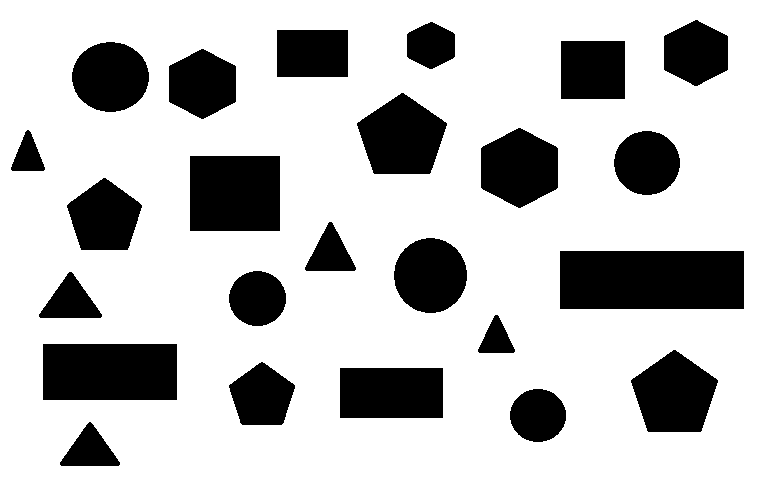

(491, 761, 3)

In [ ]:
shapes = cv2.imread('/content/7Qnug.jpg')
cv2_imshow(shapes)
shapes.shape

In [ ]:
gray_shapes = cv2.cvtColor(shapes, cv2.COLOR_BGR2GRAY)
_,thresh1 = cv2.threshold(gray_shapes,250,255,cv2.THRESH_BINARY)
((shapes == 0) | (shapes == 255)).all()

True

In [ ]:
contours, hierarchy = cv2.findContours(
    thresh1,
    cv2.RETR_TREE,
    cv2.CHAIN_APPROX_SIMPLE
)

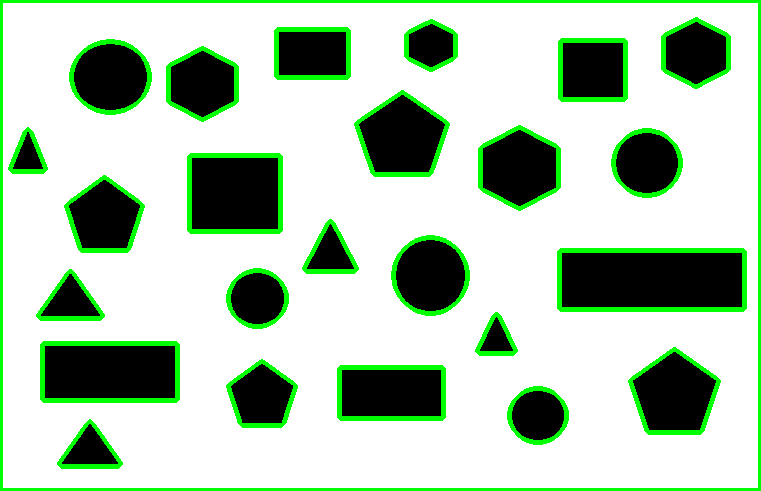

In [ ]:
img_with_all_contours = cv2.drawContours(shapes.copy(), contours, contourIdx = -1, color=(0,255,0),thickness = 3)
cv2_imshow(img_with_all_contours)

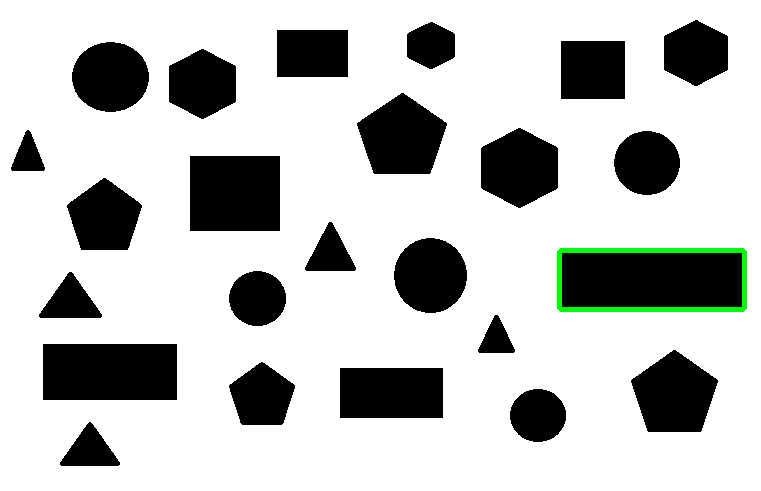

In [ ]:
img_with_contours = cv2.drawContours(shapes.copy(),
                                     contours, 
                                     contourIdx =10,
                                     color=(0,255,0),
                                     thickness = 3
                                     )
cv2_imshow(img_with_contours)

In [ ]:
undimentioned_hierarchy = hierarchy.reshape(-1,4)
hierarchy_df = pd.DataFrame(data=undimentioned_hierarchy, 
             columns=['next', 'previous', 'first child', 'parent']
             )
hierarchy_df

next  previous  first child  parent
0     -1        -1            1      -1
1      2        -1           -1       0
2      3         1           -1       0
3      4         2           -1       0
4      5         3           -1       0
5      6         4           -1       0
6      7         5           -1       0
7      8         6           -1       0
8      9         7           -1       0
9     10         8           -1       0
10    11         9           -1       0
11    12        10           -1       0
12    13        11           -1       0
13    14        12           -1       0
14    15        13           -1       0
15    16        14           -1       0
16    17        15           -1       0
17    18        16           -1       0
18    19        17           -1       0
19    20        18           -1       0
20    21        19           -1       0
21    22        20           -1       0
22    23        21           -1       0
23    24        22           -1       0
24    -1        23           -1       0

In [ ]:
filtered_contours = []
has_a_child = []

for contour, h in zip(contours, hierarchy[0]):
    if h[3] == 0:
        filtered_contours.append(contour)
    if h[2] != -1:
        has_a_child.append(1)
    else:
        has_a_child.append(0)
print(f'czy znaleziono zewnętną ramkę: {sum(has_a_child) == 1}' )

czy znaleziono zewnętną ramkę: True


In [ ]:
for i, no_vertices in enumerate(filtered_contours):
  print(i, len(filtered_contours[i]))

0 52
1 78
2 8
3 88
4 120
5 8
6 72
7 56
8 82
9 8
10 112
11 92
12 100
13 8
14 92
15 64
16 144
17 126
18 128
19 106
20 8
21 8
22 88
23 122


In [ ]:
features_list = []

for contour, childs in zip(filtered_contours, has_a_child):
    moments = cv2.moments(contour)
    hu_moments = cv2.HuMoments(moments)

    features = {x: hu[0] for x, hu in enumerate(hu_moments)}

    contour_area = cv2.contourArea(contour)
    arc_length = cv2.arcLength(contour, True)
    features['circularity'] = 4 * 3.14 * contour_area / arc_length**2

    features_list.append(features)

import pandas as pd
pd.options.display.float_format = "{:,.2f}".format

df = pd.DataFrame(features_list)
df

0    1    2    3     4     5     6  circularity
0  0.19 0.00 0.00 0.00 -0.00 -0.00  0.00         0.63
1  0.16 0.00 0.00 0.00 -0.00 -0.00 -0.00         0.90
2  0.21 0.02 0.00 0.00  0.00 -0.00  0.00         0.70
3  0.16 0.00 0.00 0.00  0.00  0.00 -0.00         0.80
4  0.16 0.00 0.00 0.00 -0.00 -0.00 -0.00         0.79
5  0.23 0.03 0.00 0.00  0.00 -0.00 -0.00         0.66
6  0.19 0.00 0.00 0.00  0.00  0.00 -0.00         0.64
7  0.19 0.00 0.00 0.00 -0.00 -0.00  0.00         0.63
8  0.16 0.00 0.00 0.00  0.00  0.00  0.00         0.90
9  0.29 0.06 0.00 0.00  0.00  0.00 -0.00         0.58
10 0.16 0.00 0.00 0.00  0.00  0.00 -0.00         0.89
11 0.19 0.00 0.00 0.00  0.00  0.00  0.00         0.62
12 0.16 0.00 0.00 0.00 -0.00  0.00  0.00         0.80
13 0.17 0.00 0.00 0.00  0.00  0.00 -0.00         0.79
14 0.16 0.00 0.00 0.00 -0.00 -0.00 -0.00         0.90
15 0.20 0.00 0.00 0.00  0.00  0.00  0.00         0.63
16 0.16 0.00 0.00 0.00 -0.00 -0.00 -0.00         0.83
17 0.16 0.00 0.00 0.00  0.00  0.00  0.00         0.79
18 0.16 0.00 0.00 0.00 -0.00 -0.00 -0.00         0.83
19 0.16 0.00 0.00 0.00  0.00  0.00 -0.00         0.89
20 0.17 0.00 0.00 0.00  0.00  0.00 -0.00         0.80
21 0.18 0.00 0.00 0.00  0.00  0.00  0.00         0.77
22 0.16 0.00 0.00 0.00  0.00  0.00  0.00         0.84
23 0.16 0.00 0.00 0.00  0.00 -0.00 -0.00         0.83

In [ ]:
sns.set_context('talk') 
sns.set_style('whitegrid') 

In [ ]:
no_clasters = range(2,24)
inertias = []
sill_implem = []

for i in no_clasters:
  kmean_model = KMeans(n_clusters=i, random_state=0).fit(df)

  inertias.append(kmean_model.inertia_)
  label = kmean_model.predict(df)
  kmean_model.fit(df)
  sill_implem.append(
      silhouette_score(X=df, 
                       labels = label)
      )
  
fig, ax = plt.subplots(2,1, sharex=True)
ax[0].plot(no_clasters,inertias)
ax[0].set_title('inertias for image via cluster number')
ax[1].plot(no_clasters,sill_implem)
ax[1].set_title('silhouet for image via cluster number')
plt.xlabel('number of clusters')
plt.xticks(no_clasters, rotation=90)
plt.show()

[1 2 3 0 0 3 1 1 2 4 2 1 0 0 2 1 5 0 5 2 0 0 5 5]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


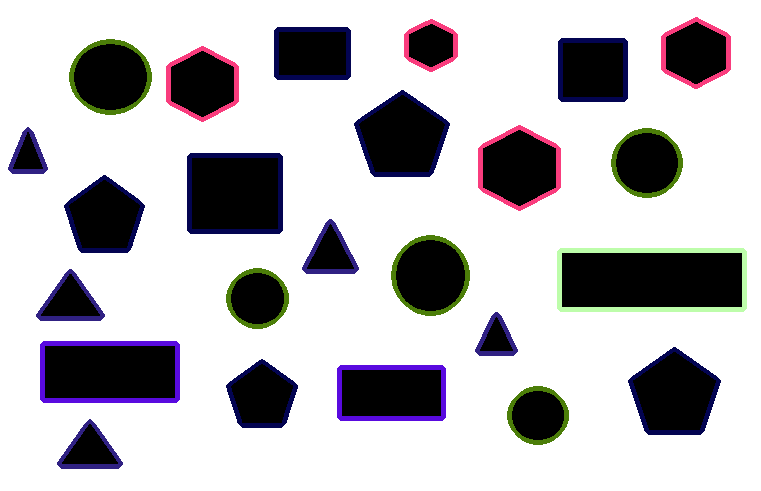

In [ ]:
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(df)
print(kmeans.labels_)
colors= np.random.randint(0, 255, size=(n_clusters, 3)).tolist()

for contour, label in zip(filtered_contours, kmeans.labels_):
 classified = cv2.drawContours(shapes, [contour], 0, colors[label], 3)

# display(df)
cv2_imshow(classified)